Rainfall data preview:
                ST_NM  Rainfall
0     Andhra Pradesh    911.58
1          Telangana    962.62
2            Gujarat    772.63
3          Karnataka   1209.84
4     Madhya Pradesh   1033.17
5        Maharashtra    939.16
6             Odisha   1455.48
7             Punjab    559.17
8          Rajasthan    482.58
9         Tamil Nadu    979.46
10       West Bengal   1676.09
11     Uttar Pradesh    766.18
12      Chhattisgarh   1265.06
13  Himachal Pradesh   1104.77
14         Jharkhand   1170.80
15       Uttarakhand   1562.89
16            Kerala   2794.31
17           Tripura   1749.51


C:\Users\IEG\AppData\Local\Temp\ipykernel_8340\3046179688.py:54: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):


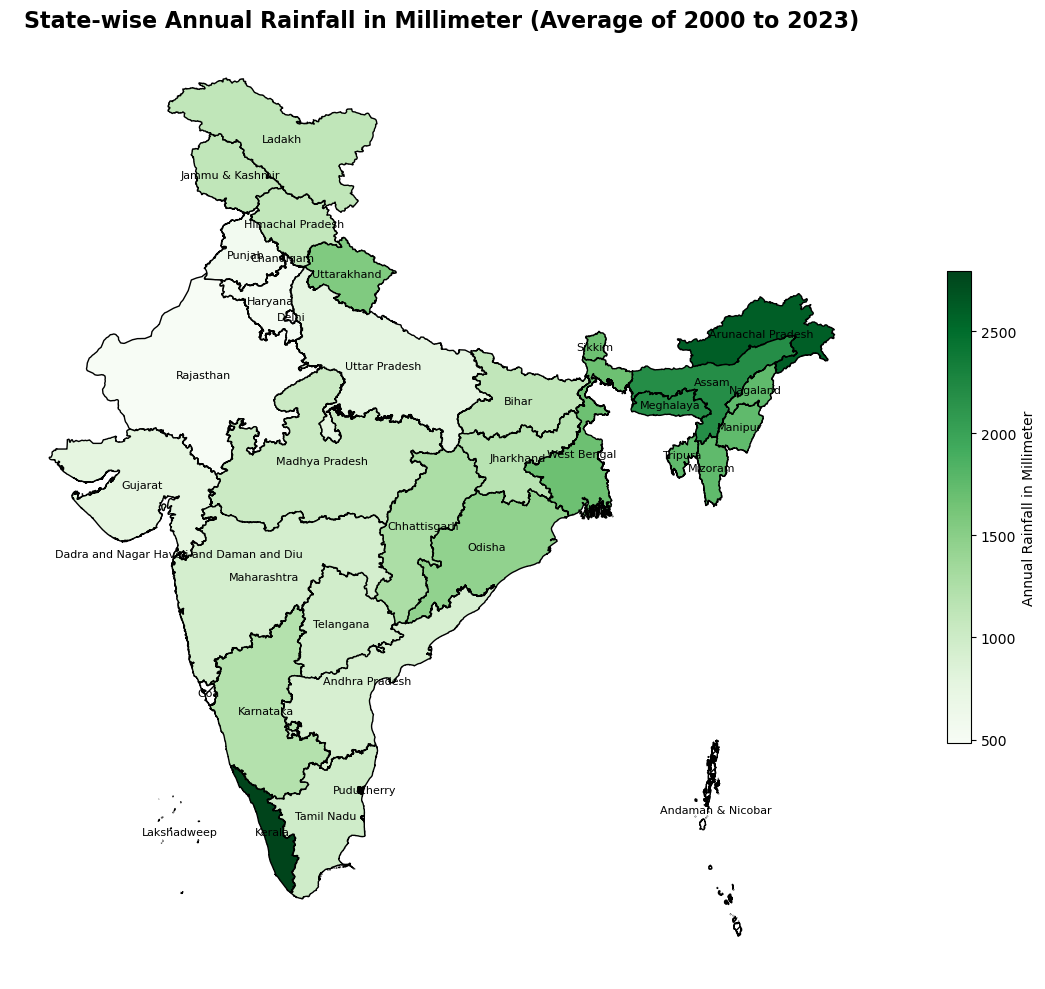

In [7]:
#!pip install fiona shapely pyproj rtree
#!pip install geopandas matplotlib pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Path to the shapefile
shapefile_path = r"C:\Users\IEG\Desktop\state_map\Admin2.shp"

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Load the reservoir volume data from the CSV file
csv_path = "Rainfall_average_2000_2023.csv"
rainfall_data = pd.read_csv(csv_path)

# Print the first few rows to inspect the data
print("Rainfall data preview:\n", rainfall_data.head(18))

# Assuming 'State' column in CSV matches 'ST_NM' in shapefile, and 'Rainfall' 
STATE_COLUMN = 'ST_NM'  # State names in the shapefile
CSV_STATE_COLUMN = 'ST_NM'  # State column in CSV (adjust if necessary)
METRE_COLUMN = 'Rainfall'    # Volume column in CSV (adjust if necessary)

# Merge the shapefile data with the reservoir data based on state names
gdf_merged = gdf.merge(rainfall_data, how='left', left_on=STATE_COLUMN, right_on=CSV_STATE_COLUMN)

# Plot the map with reservoir volumes, ensuring that missing data shows as blank or NaN
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a choropleth map for reservoir volumes
gdf_merged.plot(
    ax=ax,
    column=METRE_COLUMN,  # Use reservoir volume for color
    cmap='Greens',          # Standard and appealing color map for volumes
    legend=True,
    edgecolor='black',
    missing_kwds={         # Define how missing data will be displayed
        "color": "white",   # States with no data will be pure white
        "hatch": "///",     # Dot-dot pattern for unavailable data
        "label": "No Data"  # Label for the missing data in the legend
    },
    legend_kwds={
        'label': "Annual Rainfall in Millimeter",
        'orientation': "vertical",
        'shrink': 0.5
    }
)

# Add a title to the map
ax.set_title("State-wise Annual Rainfall in Millimeter (Average of 2000 to 2023)", fontsize=16, fontweight='bold')

# Annotate each state with its name inside the map, no bold for state names
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Remove the axis for a cleaner map
ax.set_axis_off()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the map
plt.show()
